<a href="https://colab.research.google.com/github/Igorgodoi/tccpucminas/blob/master/TCCMINAS_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autor: Igor Reis de Godoi
# TCC PUCMINAS 2020 - Predição da duração de uma audiência trabalhista
# Quarta Parte: Criação de Modelos de Machine Learning

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Importando o dataset audiencias processada
drive.mount('/content/drive')
df_audiencia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/audiencia_processada.csv', encoding='CP1252')
# Eliminando coluna municipio, pois é redundante com nome_municipio
df_audiencia=df_audiencia.drop(['municipio','Unnamed: 0','dt_inicio_programada','hora_abertura','hora_encerramento', 'data_audiencia' , 'dia_semana', 'minutos_do_dia'], axis=1)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Ajustando tipagem de colunas
colunas_categoricas = ['uf_municipio', 'nome_municipio', 'tipo_audiencia', 'vara_trabalho', 'classe_processual', 'juiz', 'sala_audiencia', 
                       'atividade_economica', 'assunto', 'autor', 'reu','marcacao_automatica', 'apos_reforma_trabalhista', 'segredo_justica',
                       'justica_gratuita','tutela_liminar','prioridade']
for coluna in colunas_categoricas:
  df_audiencia[coluna] = df_audiencia[coluna].astype('category')


df_audiencia.head()

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,marcacao_automatica,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu,duracao_audiencia
0,RO,Cacoal,85359,Inquirição Testemunha,863,CartPrecCiv,64921,Manual,71,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,ATIVIDADE NÃO IDENTIFICADA,Objetos de Cartas Precatórias / de Ordem / Rog...,554672,863690,5
1,RO,Cacoal,85359,Inquirição Testemunha,1465,CartPrecCiv,174280,Manual,149,Apos Reforma,300000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Objetos de Cartas Precatórias / de Ordem / Rog...,529280,47786,5
2,RO,Guajará-Mirim,46174,Una,659,ATOrd,195134,Manual,29,Apos Reforma,38203.21,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ESPORTE E LAZER,"Remuneração, Verbas Indenizatórias e Benefícios",970398,970401,15
3,RO,Ji-Paraná,128969,Inquirição Testemunha,20,CartPrecCiv,7711,Manual,236,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,SAÚDE,Objetos de Cartas Precatórias / de Ordem / Rog...,1140000,1140002,8
4,RO,Porto Velho,529544,Conciliação em Execução,653,ETCiv,100086,Manual,165,Apos Reforma,2000.00,Sem Segredo,Nao Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Atos executórios,860039,253308,3


In [5]:
df_audiencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250145 entries, 0 to 250144
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   uf_municipio                      250145 non-null  category
 1   nome_municipio                    250145 non-null  category
 2   populacao_estimada2019_municipio  250145 non-null  int64   
 3   tipo_audiencia                    250145 non-null  category
 4   vara_trabalho                     250145 non-null  category
 5   classe_processual                 250145 non-null  category
 6   juiz                              250145 non-null  category
 7   marcacao_automatica               250145 non-null  category
 8   sala_audiencia                    250145 non-null  category
 9   apos_reforma_trabalhista          250145 non-null  category
 10  valor_causa                       250145 non-null  float64 
 11  segredo_justica                   25014

In [6]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(df_audiencia.drop('duracao_audiencia',axis=1),df_audiencia['duracao_audiencia'],test_size=0.3, random_state=0)
df_audiencia_train=pd.concat([X_train,y_train], axis=1)
df_audiencia_test=pd.concat([X_test,y_test], axis=1)

In [8]:
print(X_train.shape, X_test.shape, df_audiencia_train.shape, df_audiencia_test.shape)

(175101, 19) (75044, 19) (175101, 20) (75044, 20)


In [9]:
X_train.head()

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,marcacao_automatica,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu
84807,PR,Curitiba,1933105,Instrução,3,ATOrd,128817,Manual,285,Antes Reforma,37000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Horas Extras,383783,94097
181853,PR,Maringá,423666,Inicial,662,ATOrd,112579,Manual,233,Antes Reforma,45000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ATIVIDADES ARTÍSTICAS E CULTURAIS,Contrato Individual de Trabalho,756660,543992
23406,PR,Campo Mourão,94859,Inicial,91,ATOrd,195125,Sugerida,229,Apos Reforma,221553.11,Sem Segredo,Gratuita,Houve tutela,Sem Prioridade,COMÉRCIO ATACADISTA E ARMAZENADOR,Contrato Individual de Trabalho,1209704,135162
186148,PR,Maringá,423666,Instrução,661,ATOrd,95758,Manual,201,Antes Reforma,50000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,"RESTAURANTES, BARES E SIMILARES",Verbas Rescisórias,613913,613918
6285,PR,Arapongas,123027,Instrução,653,ATOrd,125096,Manual,74,Antes Reforma,40000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ATIVIDADE NÃO CLASSIFICADA NA TABELA,Responsabilidade Solidária / Subsidiária,543958,39394


In [10]:
y_train.head()

84807     11
181853     3
23406      4
186148     6
6285       8
Name: duracao_audiencia, dtype: int64

In [11]:
df_audiencia_train.head()

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,marcacao_automatica,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu,duracao_audiencia
84807,PR,Curitiba,1933105,Instrução,3,ATOrd,128817,Manual,285,Antes Reforma,37000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,COMÉRCIO VAREJISTA,Horas Extras,383783,94097,11
181853,PR,Maringá,423666,Inicial,662,ATOrd,112579,Manual,233,Antes Reforma,45000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ATIVIDADES ARTÍSTICAS E CULTURAIS,Contrato Individual de Trabalho,756660,543992,3
23406,PR,Campo Mourão,94859,Inicial,91,ATOrd,195125,Sugerida,229,Apos Reforma,221553.11,Sem Segredo,Gratuita,Houve tutela,Sem Prioridade,COMÉRCIO ATACADISTA E ARMAZENADOR,Contrato Individual de Trabalho,1209704,135162,4
186148,PR,Maringá,423666,Instrução,661,ATOrd,95758,Manual,201,Antes Reforma,50000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,"RESTAURANTES, BARES E SIMILARES",Verbas Rescisórias,613913,613918,6
6285,PR,Arapongas,123027,Instrução,653,ATOrd,125096,Manual,74,Antes Reforma,40000.00,Sem Segredo,Gratuita,Sem tutela,Sem Prioridade,ATIVIDADE NÃO CLASSIFICADA NA TABELA,Responsabilidade Solidária / Subsidiária,543958,39394,8


In [12]:
# Primeira predição, sem nenhum tratamento
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [13]:
modelo1 = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=0)
modelo1.fit(X_train, y_train)

ValueError: ignored

In [15]:
# Encoder Ordinal
!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
enc = OrdinalEncoder(cols=colunas_categoricas)
enc.fit(df_audiencia_train)
df_audiencia_train_ord = enc.transform(df_audiencia_train)

     |████████████████████████████████| 81kB 2.1MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
df_audiencia_test_ord = enc.transform(df_audiencia_test)

In [17]:
df_audiencia_test_ord.head()

,uf_municipio,nome_municipio,populacao_estimada2019_municipio,tipo_audiencia,vara_trabalho,classe_processual,juiz,marcacao_automatica,sala_audiencia,apos_reforma_trabalhista,valor_causa,segredo_justica,justica_gratuita,tutela_liminar,prioridade,atividade_economica,assunto,autor,reu,duracao_audiencia
206151,1,13.0,154936,1,56.0,1,70.0,1,72.0,2,41255.12,1,1,1,1,22,16.0,35924.0,687.0,39
6819,1,4.0,123027,1,5.0,1,22.0,1,5.0,2,49864.13,1,1,1,1,9,15.0,-1.0,7950.0,23
57964,1,1.0,1933105,2,44.0,1,53.0,1,53.0,1,40000.00,1,1,1,1,18,43.0,-1.0,52.0,2
59422,1,1.0,1933105,2,44.0,1,53.0,1,53.0,1,40000.00,1,1,1,1,18,1.0,-1.0,2501.0,2
221225,1,18.0,351736,1,29.0,1,36.0,1,35.0,2,71253.85,1,2,1,1,10,1.0,7458.0,2815.0,13


In [18]:
X_train_ord = df_audiencia_train_ord.drop("duracao_audiencia", axis=1)
X_test_ord = df_audiencia_test_ord.drop("duracao_audiencia", axis=1)

y_train_ord = df_audiencia_train_ord["duracao_audiencia"]
y_test_ord = df_audiencia_test_ord["duracao_audiencia"]

mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22)
mdl.fit(X_train_ord, y_train_ord)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [19]:
predito = mdl.predict(X_test_ord)

In [20]:
mean_absolute_error(y_test_ord, predito)

7.575519007175916

In [21]:
predito[:5]

array([23.40666667, 25.07333333,  3.18      ,  2.97666667, 23.49666667])

In [22]:
y_test_ord[:5]

206151    39
6819      23
57964      2
59422      2
221225    13
Name: duracao_audiencia, dtype: int64

In [23]:
mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22, min_samples_leaf=200)
mdl.fit(X_train_ord, y_train_ord)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=200,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [24]:
predito = mdl.predict(X_test_ord)
mean_absolute_error(y_test_ord, predito)

7.186305981151011

In [25]:
predito[:5]

array([20.71219021, 17.96288894,  2.30323902,  2.73263271, 20.63104595])

In [ ]:
y_test_ord[:5]

111234    30
192521    20
20749      8
123050     4
129014    42
Name: duracao_audiencia, dtype: int64

In [26]:
# tuning hiperparametros
from sklearn.model_selection import RandomizedSearchCV
mdl.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 200,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 6,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid


{'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 650, 1100, 1550, 2000]}

In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=22, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train_ord, y_train_ord)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=  52.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=  52.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=12.1min
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=True, total=12.2min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=23.6min
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=11

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 79.4min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [29]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 650}

In [31]:
# Setando os hiperparametros tunados
mdlTunado = RandomForestRegressor(n_jobs=6, n_estimators=650, random_state=22, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', max_depth=70 )
mdlTunado.fit(X_train_ord, y_train_ord)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=650, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [33]:
preditoTunado = mdlTunado.predict(X_test_ord)
mean_absolute_error(y_test_ord, preditoTunado)

7.169625897006572

In [34]:
preditoTunado[:5]

array([19.51159264, 18.68832985,  3.32277668,  3.26098369, 22.7417767 ])

In [35]:
y_test_ord[:5]

206151    39
6819      23
57964      2
59422      2
221225    13
Name: duracao_audiencia, dtype: int64

In [36]:
# Encoding atributos categóricos
from category_encoders.target_encoder import TargetEncoder

In [37]:
enc = TargetEncoder(cols=colunas_categoricas, min_samples_leaf=200)
enc.fit(df_audiencia_train, df_audiencia_train['duracao_audiencia'])
df_audiencia_train_trg = enc.transform(df_audiencia_train)
df_audiencia_test_trg = enc.transform(df_audiencia_test)


In [38]:
df_audiencia_train_trg.uf_municipio.value_counts()

10.573850    173202
10.601756       682
12.125402       622
12.826873       387
15.584867       208
Name: uf_municipio, dtype: int64

In [39]:
X_train_trg = df_audiencia_train_trg.drop("duracao_audiencia", axis=1)
X_test_trg = df_audiencia_test_trg.drop("duracao_audiencia", axis=1)

y_train_trg = df_audiencia_train_trg["duracao_audiencia"]
y_test_trg = df_audiencia_test_trg["duracao_audiencia"]

mdl_trg = RandomForestRegressor(n_jobs=6, n_estimators=650, random_state=22, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', max_depth=70)
mdl_trg.fit(X_train_trg, y_train_trg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=650, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [40]:
p_trg = mdl.predict(X_test_trg)
mean_absolute_error(y_test_trg, p_trg)

8.658679100927053

In [41]:
p_trg[:5]

array([3.62391572, 3.62391572, 3.81755377, 3.84050281, 3.62391572])

In [42]:
y_test_trg[:5]

206151    39
6819      23
57964      2
59422      2
221225    13
Name: duracao_audiencia, dtype: int64

In [43]:
mdlTunado.feature_importances_

array([0.00105663, 0.02514018, 0.02623164, 0.4384904 , 0.04140917,
       0.01491285, 0.04819348, 0.00447404, 0.04547821, 0.01239985,
       0.07253317, 0.00084348, 0.00630877, 0.00342861, 0.00246069,
       0.05030236, 0.04991529, 0.07453193, 0.08188925])

Feature: 0, Score: 0.00106
Feature: 1, Score: 0.02514
Feature: 2, Score: 0.02623
Feature: 3, Score: 0.43849
Feature: 4, Score: 0.04141
Feature: 5, Score: 0.01491
Feature: 6, Score: 0.04819
Feature: 7, Score: 0.00447
Feature: 8, Score: 0.04548
Feature: 9, Score: 0.01240
Feature: 10, Score: 0.07253
Feature: 11, Score: 0.00084
Feature: 12, Score: 0.00631
Feature: 13, Score: 0.00343
Feature: 14, Score: 0.00246
Feature: 15, Score: 0.05030
Feature: 16, Score: 0.04992
Feature: 17, Score: 0.07453
Feature: 18, Score: 0.08189


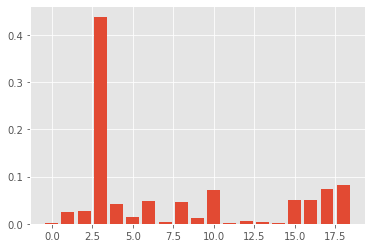

In [44]:
importancia = mdlTunado.feature_importances_
# summarize feature importance
for i,v in enumerate(importancia):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importancia))], importancia)
pyplot.show()

In [45]:
feature_importances = pd.DataFrame(mdlTunado.feature_importances_,
                                   index = X_train_trg.columns,
                                   columns=['importancia']).sort_values('importancia', ascending=False)

In [46]:
feature_importances

,importancia
tipo_audiencia,0.438490
reu,0.081889
autor,0.074532
valor_causa,0.072533
atividade_economica,0.050302
assunto,0.049915
juiz,0.048193
sala_audiencia,0.045478
vara_trabalho,0.041409
populacao_estimada2019_municipio,0.026232


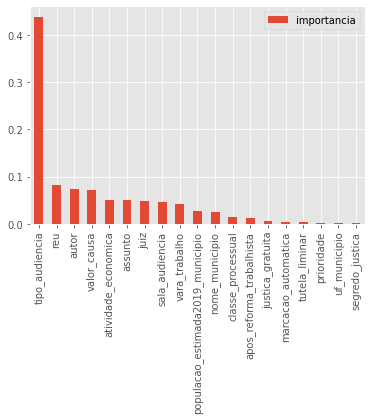

In [48]:
feature_importances.plot(kind='bar')

In [64]:
# Eliminado colunas com pouca importância, uma a uma na ordem inversa de importância. Determinando qual é a melhor.
colunas_eliminar=['reu','autor','valor_causa','atividade_economica','assunto', 'juiz', 'sala_audiencia', 'vara_trabalho', 
                  'populacao_estimada2019_municipio', 'nome_municipio', 'classe_processual', 'apos_reforma_trabalhista', 
                  'segredo_justica','uf_municipio','prioridade','tutela_liminar','marcacao_automatica','justica_gratuita']


In [66]:
X_train_ord2=X_train_ord.copy()
X_test_ord2=X_test_ord.copy()

for coluna in reversed(colunas_eliminar):
  X_train_ord2=X_train_ord2.drop(columns=coluna, axis=1)
  X_test_ord2=X_test_ord2.drop(columns=coluna, axis=1)
  mdlTunado2 = RandomForestRegressor(n_jobs=6, n_estimators=650, random_state=22, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', max_depth=70 )
  mdlTunado2.fit(X_train_ord2, y_train_ord)
  preditoTunado2 = mdlTunado2.predict(X_test_ord2)
  mae=mean_absolute_error(y_test_ord, preditoTunado2)
  print("Coluna Eliminada: {} - MAE = {}".format(coluna,mae))
  

Coluna Eliminada: justica_gratuita - MAE = 7.171722174824094
Coluna Eliminada: marcacao_automatica - MAE = 7.177781344017157
Coluna Eliminada: tutela_liminar - MAE = 7.167213760992077
Coluna Eliminada: prioridade - MAE = 7.209926282314803
Coluna Eliminada: uf_municipio - MAE = 7.198579671777153
Coluna Eliminada: segredo_justica - MAE = 7.1852208279657015
Coluna Eliminada: apos_reforma_trabalhista - MAE = 7.16534593195975
Coluna Eliminada: classe_processual - MAE = 7.204032138118465
Coluna Eliminada: nome_municipio - MAE = 7.203338744214399
Coluna Eliminada: populacao_estimada2019_municipio - MAE = 7.214975124249408
Coluna Eliminada: vara_trabalho - MAE = 7.281340991465531
Coluna Eliminada: sala_audiencia - MAE = 7.273126372888983
Coluna Eliminada: juiz - MAE = 7.302571581520042
Coluna Eliminada: assunto - MAE = 7.307172551307031
Coluna Eliminada: atividade_economica - MAE = 7.3151596160841175
Coluna Eliminada: valor_causa - MAE = 7.429997873191814
Coluna Eliminada: autor - MAE = 7.3367

In [67]:
# Eliminando as 3 piores colunas apresentou um resultado melhor. Refazendo
colunas_eliminar=['tutela_liminar','marcacao_automatica','justica_gratuita']
X_train_ord2=X_train_ord.drop(columns=colunas_eliminar)
X_test_ord2=X_test_ord.drop(columns=colunas_eliminar)

mdlTunado2 = RandomForestRegressor(n_jobs=6, n_estimators=650, random_state=22, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', max_depth=70 )
mdlTunado2.fit(X_train_ord2, y_train_ord)
preditoTunado2 = mdlTunado2.predict(X_test_ord2)
mae=mean_absolute_error(y_test_ord, preditoTunado2)
print("Coluna Eliminada: {} - MAE = {}".format(coluna,mae))



Coluna Eliminada: reu - MAE = 7.167213760992077


In [68]:
preditoTunado2[:10]


array([20.66678467, 18.16894956,  3.19928842,  3.43959183, 22.81269227,
       17.47204529, 23.7825233 , 13.54028887,  4.75277108,  6.82599954])

In [69]:
y_test_ord[:10]

206151    39
6819      23
57964      2
59422      2
221225    13
141304     6
168500     7
149078    35
228219     3
35758      5
Name: duracao_audiencia, dtype: int64

In [58]:
mdlTunado2 = RandomForestRegressor(n_jobs=6, n_estimators=650, random_state=22, min_samples_leaf=4, min_samples_split=10, max_features='sqrt', max_depth=70 )
mdlTunado2.fit(X_train_ord2, y_train_ord)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=650, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [59]:
preditoTunado2 = mdlTunado2.predict(X_test_ord2)
mean_absolute_error(y_test_ord, preditoTunado2)

7.162986411739751

In [60]:
preditoTunado2[:5]

array([19.93676739, 19.87850782,  3.31914192,  3.17495192, 21.33972914])

In [61]:
y_test_ord[:5]

206151    39
6819      23
57964      2
59422      2
221225    13
Name: duracao_audiencia, dtype: int64

In [72]:
# Utilizando encoding bayesiano
!pip install hccEncoding
#from hccEncoding.EncoderForClassification import BayesEncoding,BayesEncodingKfold,LOOEncoding,LOOEncodingKfold
from hccEncoding.EncoderForRegression import BayesEncoding,BayesEncodingKfold,LOOEncoding,LOOEncodingKfold

In [78]:
train_BayesEncoding,test_BayesEncoding=BayesEncodingKfold(X_train,X_test,'duracao_audiencia','reu')

KeyError: ignored

In [85]:
# Usando algoritimo 
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=22)
regressor.fit(X_train_ord, y_train_ord)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=22, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_test_ord, y_pred) for y_pred in regressor.staged_predict(X_test_ord)]
best_n_estimators = np.argmin(errors)

In [87]:
best_n_estimators

2

In [88]:
regressor = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, learning_rate=1.0, random_state=22)
regressor.fit(X_train_ord, y_train_ord)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=22, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
predito = regressor.predict(X_test_ord)
mean_absolute_error(y_test_ord, predito)

7.520213456072019

In [90]:
predito[:10]

array([19.20273855, 19.20273855,  3.35271639,  3.35271639, 23.85806602,
       19.20273855, 19.20273855, 10.04608718,  3.35271639, 11.31332959])

In [91]:
y_test_ord[:10]

206151    39
6819      23
57964      2
59422      2
221225    13
141304     6
168500     7
149078    35
228219     3
35758      5
Name: duracao_audiencia, dtype: int64

In [92]:
# Testando XGBOOST Regression
import xgboost as xgb

In [95]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10, random_state=22)

In [96]:
xg_reg.fit(X_train_ord, y_train_ord)
predito = xg_reg.predict(X_test_ord)
mean_absolute_error(y_test_ord, predito)

7.864296313580353